<a href="https://colab.research.google.com/github/carmnt/DSC180A-GPN/blob/main/dsc180a_quarter_1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet git+https://github.com/songlab-cal/gpn.git

  Preparing metadata (setup.py) ... done


In [ ]:
import gpn.model
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch
from transformers import AutoModel, AutoModelForMaskedLM, AutoTokenizer

In [ ]:
model_path = "songlab/gpn-brassicales"

In [ ]:
seq = "CGGGTTAAAAATCTAGTTGTTATTATTAAAGGAAATAAAATATCCTCATAAAACAATTTGTTGTAATCTATCTTTGGGCTAATGTTCTTATCCTACAAGACGAACCCTGACCGTATTCGTCGTAGAAAAAAAATTGCTTCGATCCCATCATTGAGTTCAATAATCGGCGCACAAAGGCCGATTCATAAAAACTCTAGGCCCATTAAAGTAAAGCCCATTCTCAACCCTATCCAGTCTCCCTGTATATATATATTTACGACACCAACCCAGCGTTGATATTTAATTTTCTTCAGTCAGAGATTTCGAAACCCTAGTCGATTTCGAGATCCAACTAACTCTGCTCCTTATCTCAGGTAAAATTCTCGCTCGAGAACTCAATTGCTTATCCAAAGTTCCAACTGAAGATGCTTTCCTACTGAATCTTAGGTTAATGTTTTGGATTTGGAATCTTACCCGAAATTTCTCTGCAGCTTGTTGAATTTGCGAAGTATGGGAGACGCTAGAGACAACGAAGCCTACGAGGAGGAGCTCTTGGACTATGAAGAAGAAGACGAGAAGGTCCCAGATTCTGGAAACAAAGTTAACGGCGAAGCTGTGAAAAAGTGAGTTTTATGGTTTCCTCGATATGTTTCATGTATACTACTGTGTGTTTAAATTTGTCGATTCTTAGATTACTACTTGATAACAAGTAGCAGTATGT"
len(seq)

700

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.get_vocab()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/516 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/77.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'a': 3, '[PAD]': 0, 'g': 5, '[MASK]': 1, 't': 6, 'c': 4, '[UNK]': 2}

In [ ]:
input_ids = tokenizer(seq, return_tensors="pt", return_attention_mask=False, return_token_type_ids=False)["input_ids"]
print(input_ids.shape)
input_ids[0, :10]

torch.Size([1, 700])


tensor([4, 5, 5, 5, 6, 6, 3, 3, 3, 3])

In [ ]:
model = AutoModel.from_pretrained(model_path)
model.eval();

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/264M [00:00<?, ?B/s]

In [ ]:
with torch.no_grad():
    embedding = model(input_ids=input_ids).last_hidden_state
embedding.shape

torch.Size([1, 700, 512])

In [ ]:
embedding_df = pd.DataFrame(StandardScaler().fit_transform(embedding[0].numpy()))
embedding_df.index.name = "Position"
embedding_df.columns.name = "Embedding dimension"
embedding_df

Embedding dimension       0         1         2         3         4    \
Position                                                                
0                   -0.518087  0.541440  0.131233  1.053514  2.222628   
1                   -0.751136  0.759646  3.220162 -1.068855  2.493009   
2                   -0.710901 -0.167387 -1.117152 -0.147013  0.793041   
3                   -1.011556  0.004416  0.785734  0.880099 -1.314013   
4                   -0.082698 -0.310124 -0.716856  3.308860 -1.243263   
...                       ...       ...       ...       ...       ...   
695                  0.465113  0.444199 -0.359129 -0.326517 -0.762708   
696                 -0.973834  1.042631 -0.170295 -0.246929 -0.420491   
697                 -0.493599  0.792000 -0.298589 -0.410181 -1.292572   
698                 -0.522386  0.205317 -0.601702 -0.850832 -0.976876   
699                 -0.626153  1.007593  0.917009 -0.092738 -0.952625   

Embedding dimension       5         6         7         8         9    ...  \
Position                                                               ...   
0                   -0.319741  3.644270  1.093816 -1.380534  0.448886  ...   
1                   -0.625320  2.157835  2.325138 -1.241314 -0.314621  ...   
2                    0.568514 -1.552413  1.677339 -2.283587 -0.763817  ...   
3                    0.547281 -0.473240  0.107972 -1.798418 -0.059565  ...   
4                   -1.491933  1.449805 -0.811679 -0.790326 -0.326596  ...   
...                       ...       ...       ...       ...       ...  ...   
695                 -0.270666  0.442167  0.046693  0.634356 -0.058325  ...   
696                 -0.682758  0.149621  0.966530  0.106324 -1.136616  ...   
697                 -0.796225  0.677159 -0.334222 -2.040731 -0.447183  ...   
698                 -0.035066 -0.241668 -0.700348 -0.486420  0.306714  ...   
699                 -0.466213  0.883619 -0.287065 -0.279275 -0.625418  ...   

Embedding dimension       502       503       504       505       506  \
Position                                                                
0                   -1.018208 -0.878754 -0.646709 -0.062723 -0.801979   
1                   -0.137703 -2.056975  1.057701  2.712365 -0.671561   
2                    5.467332 -1.575754  1.160327 -0.117526 -0.490750   
3                    1.310843 -2.385743 -0.696324 -0.386536  0.107417   
4                   -0.745451 -1.395647 -0.916111 -0.836167  0.454243   
...                       ...       ...       ...       ...       ...   
695                  0.927364 -0.005681 -0.227226 -0.692033 -0.608916   
696                 -0.626092 -0.790864 -1.010916  3.175091  0.892962   
697                 -0.239599  0.605497 -0.869040 -0.338021 -0.572182   
698                 -0.518808 -0.619348 -1.085236  0.543432  1.169047   
699                  0.492943  0.357889 -0.529668 -0.540643  0.749181   

Embedding dimension       507       508       509       510       511  
Position                                                               
0                   -0.035079  2.433414  0.438934  9.229937 -1.419600  
1                   -0.513203  0.225547 -0.879120  3.302934 -1.078403  
2                    0.919964  0.110476  1.463595  1.251709  0.042053  
3                    1.299432  0.853751  1.123085 -0.350534 -0.640750  
4                    0.024448 -1.058236  1.308294  3.921493  0.346961  
...                       ...       ...       ...       ...       ...  
695                  0.124922 -0.665498 -0.061753 -0.602381  0.614786  
696                 -0.206767 -0.499504 -1.133052 -0.029237 -0.962530  
697                 -0.486568 -0.789857  1.470952 -0.514977  0.262317  
698                 -0.177514  0.491308  0.253235  0.506027 -0.915845  
699                 -0.407364 -0.506373  0.885929 -0.595676  0.840869  

[700 rows x 512 columns]

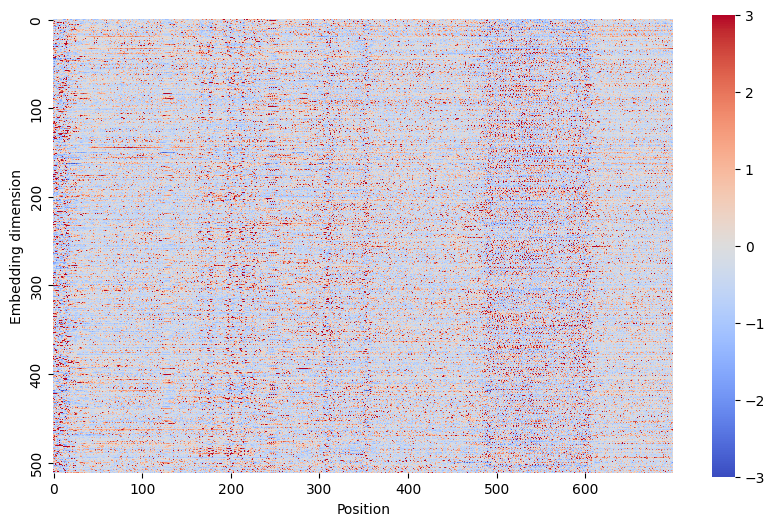

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(embedding_df.T, center=0, vmin=-3, vmax=3, cmap="coolwarm", square=True, xticklabels=100, yticklabels=100);

In [ ]:
model_for_mlm = AutoModelForMaskedLM.from_pretrained(model_path)
model_for_mlm.eval();

In [ ]:
seq[489:492]  # Start codon

'ATG'

In [ ]:
pos = 489  # Let's mask the A and check the model predictions
input_ids[0, pos] = tokenizer.mask_token_id

In [ ]:
input_ids
with torch.no_grad():
    all_logits = model_for_mlm(input_ids=input_ids).logits
all_logits.shape

torch.Size([1, 700, 7])

In [ ]:
nucleotides = list('acgt')
logits = all_logits[0, pos, [tokenizer.get_vocab()[nc] for nc in nucleotides]]
logits

tensor([ 4.8509, -2.3441, -1.7025, -1.5116])

In [ ]:
probs = torch.nn.functional.softmax(logits, dim=0).numpy()
probs

array([9.9611449e-01, 7.4742787e-04, 1.4196951e-03, 1.7183276e-03],
      dtype=float32)

<Axes: xlabel='nucleotide', ylabel='probability'>

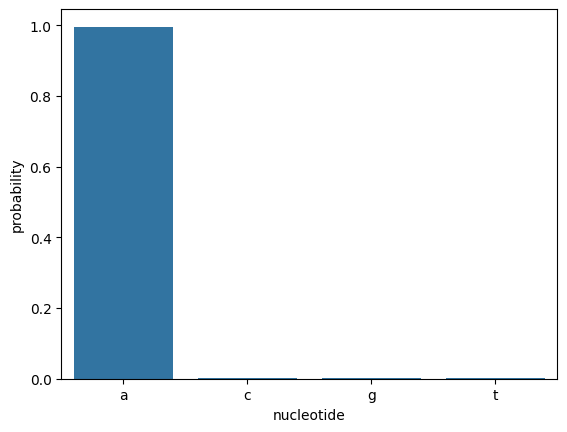

In [ ]:
probs_df = pd.DataFrame(dict(nucleotide=nucleotides, probability=probs))
sns.barplot(data=probs_df, x="nucleotide", y="probability")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Importing Data

In [ ]:
!pip install --quiet git+https://github.com/songlab-cal/gpn.git

  Preparing metadata (setup.py) ... done


In [ ]:
# from datasets import load_dataset
# ds = load_dataset("songlab/genomes-brassicales-balanced-v1")

# pd.DataFrame(ds['train'])

In [ ]:
import pandas as pd
from datasets import load_dataset

# Load data seperately
train_dataset = load_dataset("songlab/genomes-brassicales-balanced-v1", split="train")
valid_dataset = load_dataset("songlab/genomes-brassicales-balanced-v1", split="validation")
test_dataset  = load_dataset("songlab/genomes-brassicales-balanced-v1", split="test")

In [ ]:
# Runs for about 5 min

## could use csv, loads 4.3m rows in 30s

train = pd.DataFrame(train_dataset[:1_000])
train.head()

assembly           chrom     start       end strand  \
0  GCF_000309985.2     NC_024803.2  44350126  44350638      -   
1  GCF_000801105.1  NW_017353143.1   6209626   6210138      +   
2  GCF_000801105.1  NW_017353146.1   2729759   2730271      -   
3  GCF_000463585.1  NW_010966372.1   1523140   1523652      +   
4  GCF_000001735.4     NC_003071.7  18874538  18875050      +   

                                                 seq  
0  AACGTTACACAAACCCAAACAAGAAAATACATCAAAAGTCACCCTA...  
1  CATCTTGAGCTTCCTCGAAAACAATCTGCTCTGTCTCTACATCATT...  
2  tacagataCAACCATCCTTGGAATGTATCATTCCACATTATACCAT...  
3  Agggaaaaatatatgaaaatttctgaatttgtaatttggtataata...  
4  GGAATGTACTAATAAACTAGAAAAGATCTTGGGTCTGACTAATGCA...

In [ ]:
most_common_chrom = train.chrom.value_counts(normalize=True).sort_values(ascending=False).index[0]
most_common_chrom

'NC_003070.9'

In [ ]:
train_chrom = train[train.chrom == most_common_chrom].reset_index(drop=True)
train_chrom.head()

assembly        chrom     start       end strand  \
0  GCF_000001735.4  NC_003070.9  27700362  27700874      +   
1  GCF_000001735.4  NC_003070.9   8127995   8128507      -   
2  GCF_000001735.4  NC_003070.9  20010578  20011090      +   
3  GCF_000001735.4  NC_003070.9   4775993   4776505      +   
4  GCF_000001735.4  NC_003070.9  10135693  10136205      -   

                                                 seq  
0  TTACCGATCCGTCTAAGCTAAGACAGATTAAGGTTCAGCAACGAAA...  
1  AAAGGTTATATCCCTCTGTGATTACCTACTTTGTGTTGATTTATGG...  
2  TCAGCTCatgatacaattttttttcttctatataacatgttttttt...  
3  TATTCCATATTTAATTAATGGGATCGAAATTCAACATTAAATTAAT...  
4  GCAAAAGCTGTTCTGTATCACCTATGAAACAAGCATTTTGACACAC...

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss
from torch.nn.utils.rnn import pad_sequence
import random

In [ ]:
def mask(seq, mask=0.15):
    '''Masks percentage of positions on a dna sequence'''
    seq_len = len(seq)
    num_mask = int(seq_len * mask)
    positions_to_mask = random.sample(range(seq_len), num_mask)

    # Masks positions on sequence
    seq_list = list(seq)
    for pos in positions_to_mask:
        seq_list[pos] = '?'

    masked_sequence = ''.join(seq_list)
    return masked_sequence

In [ ]:
# Sequences from NC_003070.9 chromosome
masked_sequences = list(mask(seq) for seq in train_chrom.seq[:10_00])
sequences = list(train_chrom.seq[:10_00])

In [ ]:
# EVERYTHING BEYOND THIS POINT IS PROBABLY WRONG

In [ ]:
# One-hot encode
hidden_size = 512

mapping = {'A': 0, 'T': 1, 'G': 2, 'C': 3, '?': 4}

def string_to_tensor(seq, mapping):
    '''Converts a DNA sequence to tensor of indices'''
    indices = [mapping[bp.upper()] for bp in seq]
    return torch.tensor(indices)

masked_sequences_tensors = [F.one_hot(string_to_tensor(seq, mapping), num_classes=hidden_size) for seq in masked_sequences]
sequences_tensors = [F.one_hot(string_to_tensor(seq, mapping), num_classes=hidden_size) for seq in sequences]

In [ ]:
padded_masked_sequences = pad_sequence(masked_sequences_tensors, batch_first=True)
padded_sequences = pad_sequence(sequences_tensors, batch_first=True)

In [ ]:
class TransposeLayer(nn.Module):
    def __init__(
        self,
    ):
        super().__init__()

    def forward(self, x):
        x = torch.transpose(x, 1, 2)
        return x

conv = nn.Sequential(
            TransposeLayer(),
            nn.Conv1d(
                in_channels=hidden_size,
                out_channels=hidden_size,
                padding="same",
                kernel_size=9,
                groups=hidden_size,
            ),
            TransposeLayer(),
            nn.GELU(),
            nn.LayerNorm(hidden_size),
        )

ffn = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.GELU(),
            nn.LayerNorm(hidden_size),
        )

In [ ]:
# Training the model
embedding_layer = nn.Embedding(num_embeddings=5, embedding_dim=1)
optimizer = torch.optim.Adam(embedding_layer.parameters(), lr=0.001)
criterion = CrossEntropyLoss()

epochs = 25
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = conv(padded_masked_sequences.float()) + ffn(padded_masked_sequences.float())
    loss = criterion(outputs.squeeze(), torch.tensor(padded_sequences, dtype=torch.float))
    loss.backward()
    optimizer.step()

<ipython-input-78-81034d9826c6>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(outputs.squeeze(), torch.tensor(padded_sequences, dtype=torch.float))


In [ ]:
# Evaluation
with torch.no_grad():
    outputs = conv(padded_masked_sequences.float()) + ffn(padded_masked_sequences.float())
    probabilities = torch.softmax(outputs, dim=-1)
    predicted_nucleotides = torch.argmax(probabilities, dim=-1)
    target_nucleotides = torch.argmax(padded_sequences, dim=-1)
    loss = criterion(outputs.squeeze(), torch.tensor(padded_sequences, dtype=torch.float)).item()
    accuracy = (predicted_nucleotides == target_nucleotides).float().mean().item()

print(f'Accuracy: {accuracy}')
print(f'Cross Entropy Loss: {loss}')

Accuracy: 0.03703278303146362
Cross Entropy Loss: 7.4444580078125


<ipython-input-79-8afe33fd75ca>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(outputs.squeeze(), torch.tensor(padded_sequences, dtype=torch.float)).item()
